In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("results.csv")
df

,Unnamed: 0,instance_name,num_agents,planner,single_agent_planner,trail,success,n_collision,time,path_length,mean_acc,mean_jerk,mean_geo,expansions,dynamic,diffusion_step,constraint,trail_path
0,0,DropRegion,7,CBS,KCBSLower,9,1,0,1.652001,2.507657,0.020073,0.026573,0.002078,5,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...
1,1,DropRegion,7,CBS,KCBSLower,0,1,0,2.120994,2.528229,0.018507,0.025316,0.001949,6,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...
2,2,DropRegion,7,CBS,KCBSLower,7,0,2,1.610450,2.426400,0.018372,0.025361,0.002233,5,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...
3,3,DropRegion,7,CBS,KCBSLower,6,1,0,4.057180,2.824457,0.018055,0.023666,0.001879,10,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...
4,4,DropRegion,7,CBS,KCBSLower,1,1,0,85.655825,2.568343,0.020826,0.027463,0.002094,15,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019,8019,ConveyorRandom,17,ECBS,WAStar,8,0,5,62.569395,1.823529,0.016179,0.019802,0.004706,79,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...
8020,8020,ConveyorRandom,17,ECBS,WAStar,4,0,10,4.279845,1.458823,0.017113,0.021264,0.002398,22,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...
8021,8021,ConveyorRandom,17,ECBS,WAStar,3,0,7,2.114698,1.517647,0.015984,0.018786,0.002135,10,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...
8022,8022,ConveyorRandom,17,ECBS,WAStar,2,0,10,2.370620,1.405882,0.016745,0.019666,0.002259,9,NaN,NaN,NaN,/Users/zhilinhe/desktop/experiment_results/ins...


In [15]:
from matplotlib.lines import Line2D
from matplotlib.text import Text
from matplotlib.legend_handler import HandlerBase


class HandlerEnvMethod(HandlerBase):
    def create_artists(
        self,
        legend,
        orig_handle,
        xdescent,
        ydescent,
        width,
        height,
        fontsize,
        trans,
    ):
        line1, label_str, line2 = orig_handle

        y = ydescent + height / 2.0

        x_l0 = xdescent + width * 0.00
        x_l1 = xdescent + width * 0.25
        x_text = xdescent + width * 0.50
        x_r0 = xdescent + width * 0.75
        x_r1 = xdescent + width * 1.00

        line1_artist = Line2D(
            [x_l0, x_l1],
            [y, y],
            linestyle=line1.get_linestyle(),
            marker=line1.get_marker(),
            color=line1.get_color(),
            transform=trans,
        )

        text_artist = Text(
            x_text,
            y,
            label_str,
            va="center",
            ha="center",
            fontsize=fontsize,
            transform=trans,
        )

        line2_artist = Line2D(
            [x_r0, x_r1],
            [y, y],
            linestyle=line2.get_linestyle(),
            marker=line2.get_marker(),
            color=line2.get_color(),
            transform=trans,
        )

        return [line1_artist, text_artist, line2_artist]

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple


def format_planner_display(planner: str, single_agent_planner: str, ablation_type: str, mdoc_baseline="") -> str:
    if planner == "CBS" and single_agent_planner == "MMDEnsemble":
        return "MMD-CBS"
    if planner == "CBS" and single_agent_planner.startswith(f"MDOCEnsemble_{mdoc_baseline}"):
        return "MDOC-CBS"
    if planner == "CBS" and single_agent_planner.startswith("MDOCEnsemble"):
        if ablation_type == "diffusion_step":
            diffusion_step = single_agent_planner.split("_")[2]
            return f"MDOC-CBS-{diffusion_step}"
        elif ablation_type == "dynamics":
            dynamics = single_agent_planner.split("_")[1]
            return f"MDOC-CBS-{dynamics}"
        elif ablation_type == "constraints":
            c = single_agent_planner.split("_")[3]
            return f"MDOC-CBS-{c}"
    if planner == "CBS" and single_agent_planner.startswith("KCBS"):
        return "KCBS"
    if planner == "CBS" and single_agent_planner == "WAStar":
        return "A*-CBS"
    if planner == "ECBS" and single_agent_planner == "WAStar":
        return "A*-ECBS"
    if planner == "ECBS" and single_agent_planner == "MMDEnsemble":
        return "MMD-ECBS"
    if planner == "ECBS" and single_agent_planner.startswith("MDOCEnsemble"):
        return "MDOC-ECBS"
    return f"{planner} | {single_agent_planner}"


def filter_data(
    df: pd.DataFrame,
    env: str = None,
    n_agents=None,
    ablation: bool = False,
    mdoc_baseline="single_100_r",
    time_upper: float = None,
    ablation_type="diffusion_step",
) -> pd.DataFrame:
    df_f = df.copy()

    if env is not None:
        df_f = df_f[df_f["instance_name"] == env]

    df_f["num_agents"] = pd.to_numeric(df_f["num_agents"], errors="coerce")

    if n_agents is not None:
        df_f = df_f[df_f["num_agents"].isin(n_agents)]

    if ablation:
        df_f = df_f[
            (df_f["planner"] == "CBS")
            & (df_f["single_agent_planner"].astype(str).str.startswith("MDOC"))
        ]
    else:
        target = f"MDOCEnsemble_{mdoc_baseline}"
        df_f = df_f[
            (df_f["single_agent_planner"].astype(str) == target)
            | (~df_f["single_agent_planner"].astype(str).str.startswith("MDOCEnsemble_"))
        ]

    if time_upper is not None and "time" in df_f.columns:
        mask_timeout = df_f["time"] > time_upper
        df_f.loc[mask_timeout, "success"] = 0

    bad_metrics = [
        "time",
        "path_length",
        "mean_acc",
        "mean_jerk",
        "mean_geo",
        "expansions",
    ]
    for col in bad_metrics:
        if col in df_f.columns:
            df_f.loc[df_f["success"] == 0, col] = float("nan")

    df_f["planner_display"] = df_f.apply(
        lambda r: format_planner_display(
            r["planner"], r["single_agent_planner"], ablation_type, mdoc_baseline
        ),
        axis=1,
    )

    return df_f


def _legend_sort_key(name: str):
    if name == "A*-CBS":
        return (0, name)
    if name == "A*-ECBS":
        return (1, name)
    if name == "KCBS":
        return (2, name)
    if name == "MMD-CBS":
        return (3, name)
    if name == "MMD-ECBS":
        return (4, name)
    if name.startswith("MDOC-CBS"):
        return (5, name)
    if name == "MDOC-ECBS":
        return (6, name)
    return (7, name)


def plot_metrics(
    df: pd.DataFrame,
    metrics=None,
    save_dir=None,
    show: bool = True,
    methods=None,
):
    if metrics is None:
        metrics = ["success", "time", "expansions"]

    df = df.copy()
    df["num_agents"] = pd.to_numeric(df["num_agents"], errors="coerce")

    for m in metrics:
        if m in df.columns:
            q = df[m].quantile(0.95)
            df.loc[df[m] > q, m] = float("nan")

    grouped = (
        df.groupby(["planner_display", "num_agents"], as_index=False)[metrics]
        .mean()
    )

    tables = {}
    for m in metrics:
        pivot = grouped.pivot_table(
            index="planner_display",
            columns="num_agents",
            values=m,
            aggfunc="mean",
        )
        pivot = pivot.sort_index(axis=1)
        tables[m] = pivot

    if save_dir is not None:
        save_dir = Path(save_dir)
        save_dir.mkdir(parents=True, exist_ok=True)

    for m in metrics:
        pivot = tables[m]

        plot_pivot = pivot
        if methods is not None:
            methods_set = set(methods)
            plot_pivot = pivot[pivot.index.isin(methods_set)]
            if plot_pivot.empty:
                continue

        if m == "success":
            m_name = "Success Rate"
        elif m == "time":
            m_name = "Planning Time"
        elif m == "expansions":
            m_name = "CT Expansions"
        else:
            m_name = m

        plt.figure(figsize=(8, 3.5))
        x_vals = plot_pivot.columns.tolist()

        color_map = {}
        other_colors = ["#ff7f0e", "#006400", "#CC79A7", "#7F7F7F"]
        other_idx = 0
        for planner_name in plot_pivot.index:
            if planner_name == "MDOC-CBS":
                color_map[planner_name] = "#1f77b4"
            elif planner_name.startswith("MMD"):
                color_map[planner_name] = "#CC0000"
            else:
                color_map[planner_name] = other_colors[other_idx % len(other_colors)]
                other_idx += 1

        for planner_name in sorted(plot_pivot.index, key=_legend_sort_key):
            row = plot_pivot.loc[planner_name]
            y_vals = row.values
            plt.plot(
                x_vals,
                y_vals,
                marker="o",
                label=planner_name,
                color=color_map.get(planner_name, "#ff7f0e"),
            )

        plt.xlabel(
            "Numbers of Agents",
            fontsize=22,
            labelpad=10,
            fontweight="bold",
        )
        plt.ylabel(
            m_name,
            fontsize=22,
            labelpad=10,
            fontweight="bold",
        )
        plt.title(
            f"{m_name} by Method",
            fontsize=26,
            fontweight="bold",
            pad=20,
        )
        plt.grid(True)
        plt.legend(fontsize=12, loc="best")

        if save_dir is not None:
            out_path = save_dir / f"{m}.png"
            plt.tight_layout()
            plt.savefig(out_path, dpi=200)

        if show:
            plt.tight_layout()
            plt.show()
        else:
            plt.close()

    return tables


def plot_metrics_two_env(
    df1: pd.DataFrame,
    df2: pd.DataFrame,
    env_names,
    metrics=None,
    save_dir=None,
    show: bool = True,
    methods=None,
):
    if metrics is None:
        metrics = ["success", "time", "expansions"]

    env1, env2 = env_names[0], env_names[1]

    df1 = df1.copy()
    df2 = df2.copy()
    df1["num_agents"] = pd.to_numeric(df1["num_agents"], errors="coerce")
    df2["num_agents"] = pd.to_numeric(df2["num_agents"], errors="coerce")

    df1["__env__"] = env1
    df2["__env__"] = env2
    df_all = pd.concat([df1, df2], ignore_index=True)

    for m in metrics:
        if m in df_all.columns:
            q = df_all[m].quantile(0.95)
            df_all.loc[df_all[m] > q, m] = float("nan")

    grouped = (
        df_all.groupby(["planner_display", "num_agents", "__env__"], as_index=False)[metrics]
        .mean()
    )

    if save_dir is not None:
        save_dir = Path(save_dir)
        save_dir.mkdir(parents=True, exist_ok=True)

    markers = ["o", "s"]
    linestyles = ["-", "--"]

    for m in metrics:
        if m == "success":
            m_name = "Success Rate"
        elif m == "time":
            m_name = "Planning Time"
        elif m == "expansions":
            m_name = "CT Expansions"
        else:
            m_name = m

        g1 = grouped[grouped["__env__"] == env1]
        g2 = grouped[grouped["__env__"] == env2]

        if g1.empty and g2.empty:
            continue

        pivot1 = g1.pivot_table(
            index="planner_display",
            columns="num_agents",
            values=m,
            aggfunc="mean",
        )
        pivot1 = pivot1.sort_index(axis=1) if not pivot1.empty else pivot1

        pivot2 = g2.pivot_table(
            index="planner_display",
            columns="num_agents",
            values=m,
            aggfunc="mean",
        )
        pivot2 = pivot2.sort_index(axis=1) if not pivot2.empty else pivot2

        methods_all = set(pivot1.index) | set(pivot2.index)
        if methods is not None:
            methods_all = methods_all & set(methods)
        methods_sorted = sorted(methods_all, key=_legend_sort_key)
        if not methods_sorted:
            continue

        plt.figure(figsize=(8, 7))

        color_map = {}
        other_colors = ["#ff7f0e", "#006400", "#CC79A7", "#7F7F7F"]
        other_idx = 0
        for planner_name in methods_sorted:
            if planner_name == "MDOC-CBS":
                color_map[planner_name] = "#1f77b4"
            elif planner_name.startswith("MMD"):
                color_map[planner_name] = "#CC0000"
            else:
                color_map[planner_name] = other_colors[other_idx % len(other_colors)]
                other_idx += 1

        handles = []
        labels = []

        for planner_name in methods_sorted:
            if planner_name in pivot1.index:
                row1 = pivot1.loc[planner_name]
                x1 = row1.index.tolist()
                y1 = row1.values
                plt.plot(
                    x1,
                    y1,
                    marker=markers[0],
                    linestyle=linestyles[0],
                    color=color_map.get(planner_name, "#ff7f0e"),
                )
            if planner_name in pivot2.index:
                row2 = pivot2.loc[planner_name]
                x2 = row2.index.tolist()
                y2 = row2.values
                plt.plot(
                    x2,
                    y2,
                    marker=markers[1],
                    linestyle=linestyles[1],
                    color=color_map.get(planner_name, "#ff7f0e"),
                )

        plt.xlabel(
            "Numbers of Agents",
            fontsize=22,
            labelpad=10,
            fontweight="bold",
        )
        plt.ylabel(
            m_name,
            fontsize=22,
            labelpad=10,
            fontweight="bold",
        )
        plt.title(
            f"{m_name} by Method",
            fontsize=26,
            fontweight="bold",
            pad=20,
        )
        plt.grid(True)

        legend_handles = []
        legend_labels = []

        for planner_name in methods_sorted:
            if (planner_name not in pivot1.index) and (planner_name not in pivot2.index):
                continue
            l1 = Line2D(
                [0],
                [0],
                marker=markers[0],
                linestyle=linestyles[0],
                color=color_map.get(planner_name, "#ff7f0e"),
            )
            l2 = Line2D(
                [0],
                [0],
                marker=markers[1],
                linestyle=linestyles[1],
                color=color_map.get(planner_name, "#ff7f0e"),
            )
            legend_handles.append((l1, planner_name, l2))
            legend_labels.append("")

#         if legend_handles:
#             legend_obj = plt.legend(
#                 legend_handles,
#                 legend_labels,
#                 handler_map={tuple: HandlerEnvMethod()},
#                 fontsize=30,
#                 loc="upper left",
#                 bbox_to_anchor=(0.0, 1.02),   
#                 borderaxespad=0.0,
#                 frameon=True,
#                 framealpha=1.0,               
#                 facecolor="white",
#                 handlelength=15,           
#                 handletextpad=0.0,
#             )

#             legend_obj.set_zorder(9999)  
        

        if save_dir is not None:
            out_path = save_dir / f"{m}_{env1}_{env2}.png"
            plt.tight_layout()
            plt.savefig(out_path, dpi=200)

        if show:
            plt.tight_layout()
            plt.show()
        else:
            plt.close()


def print_metrics(df: pd.DataFrame):
    metrics = [
        "path_length",
#         "mean_acc",
#         "mean_jerk",
        "mean_geo",
    ]
    for m in metrics:
        if m not in df.columns:
            return

    grouped = df.groupby(["planner_display", "num_agents"], as_index=False)

    mean_df = grouped[metrics].mean()
    std_df = grouped[metrics].std().rename(columns={m: f"{m}_std" for m in metrics})

    merged = pd.merge(mean_df, std_df,
                      on=["planner_display", "num_agents"], how="left")

    final_table = (
        merged.groupby("planner_display")
              .agg("mean")
              .reset_index()
    )

    if "num_agents" in final_table.columns:
        final_table = final_table.drop(columns=["num_agents"])

    for col in final_table.columns:
        if col == "planner_display":
            continue
        final_table[col] = final_table[col].apply(
            lambda x: f"{x:.2e}" if abs(x) < 0.01 else f"{x:.2f}"
        )

    print(final_table)




def main(
    env,
    n_agents=None,
    ablation=False,
    ablation_type="diffusion_step",
    time_upper=None,
    mdoc_baseline="single_100_r",
    methods=None,
):
    if isinstance(env, (list, tuple)):
        if len(env) == 1:
            env_name = env[0]
            print(f"<<<<<<<{env_name}>>>>>>")
            df_c = filter_data(
                df,
                env=env_name,
                n_agents=n_agents,
                ablation=ablation,
                time_upper=time_upper,
                mdoc_baseline=mdoc_baseline,
                ablation_type=ablation_type,
            )
            metrics = ["success", "time", "expansions"]
            tables = plot_metrics(
                df_c,
                metrics=metrics,
                save_dir="plots",
                show=True,
                methods=methods,
            )
            print_metrics(df_c)
            print()
            return tables
        elif len(env) == 2:
            env1, env2 = env[0], env[1]
            print(f"<<<<<<<{env1} & {env2}>>>>>>")
            df1 = filter_data(
                df,
                env=env1,
                n_agents=n_agents,
                ablation=ablation,
                time_upper=time_upper,
                mdoc_baseline=mdoc_baseline,
                ablation_type=ablation_type,
            )
            df2 = filter_data(
                df,
                env=env2,
                n_agents=n_agents,
                ablation=ablation,
                time_upper=time_upper,
                mdoc_baseline=mdoc_baseline,
                ablation_type=ablation_type,
            )
            metrics = ["success", "time", "expansions"]
            plot_metrics_two_env(
                df1,
                df2,
                env_names=[env1, env2],
                metrics=metrics,
                save_dir="plots",
                show=True,
                methods=methods,
            )
            print(f"<<<<<<<{env1}>>>>>>")
            print_metrics(df1)
            print()
            print(f"<<<<<<<{env2}>>>>>>")
            print_metrics(df2)
            print()
            tables1 = plot_metrics(
                df1,
                metrics=metrics,
                save_dir=None,
                show=False,
                methods=methods,
            )
            tables2 = plot_metrics(
                df2,
                metrics=metrics,
                save_dir=None,
                show=False,
                methods=methods,
            )
            return {env1: tables1, env2: tables2}
        else:
            raise ValueError("env list length must be 1 or 2")

    print(f"<<<<<<<{env}>>>>>>")
    df_c = filter_data(
        df,
        env=env,
        n_agents=n_agents,
        ablation=ablation,
        time_upper=time_upper,
        mdoc_baseline=mdoc_baseline,
        ablation_type=ablation_type,
    )
    metrics = ["success", "time", "expansions"]
    tables = plot_metrics(
        df_c,
        metrics=metrics,
        save_dir="plots",
        show=True,
        methods=methods,
    )
    print_metrics(df_c)
    print()
    return tables

<<<<<<<EmptyCircle & EmptyBoundary>>>>>>


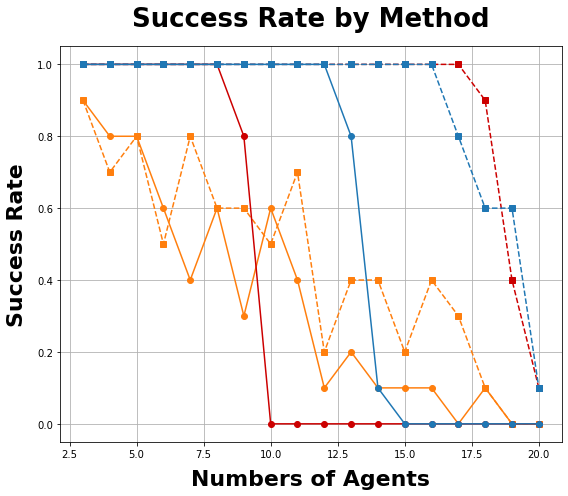

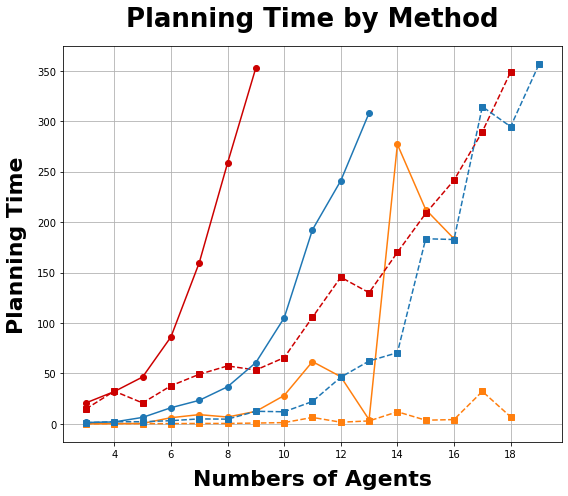

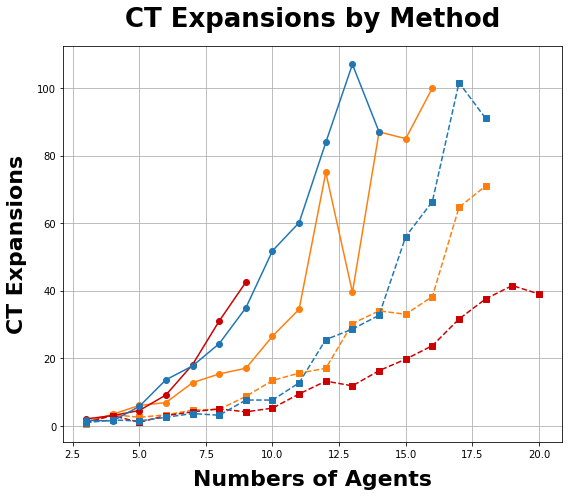

<<<<<<<EmptyCircle>>>>>>
  planner_display path_length  mean_geo path_length_std mean_geo_std
0          A*-CBS        1.98  2.10e-03        0.00e+00     0.00e+00
1         A*-ECBS        2.00  2.34e-03        0.00e+00     0.00e+00
2            KCBS        2.21  2.05e-03            0.07     2.75e-04
3        MDOC-CBS        1.83  6.71e-05            0.03     5.05e-06
4         MMD-CBS        2.91  6.06e-03            0.06     5.33e-04

<<<<<<<EmptyBoundary>>>>>>
  planner_display path_length  mean_geo path_length_std mean_geo_std
0          A*-CBS        1.88  1.78e-03             nan          nan
1         A*-ECBS        1.89  1.87e-03             nan          nan
2            KCBS        2.22  1.97e-03            0.08     2.64e-04
3        MDOC-CBS        1.90  6.44e-05            0.01     2.64e-06
4         MMD-CBS        2.90  5.54e-03            0.04     3.50e-04

<<<<<<<ConveyorCircle & ConveyorBoundary>>>>>>


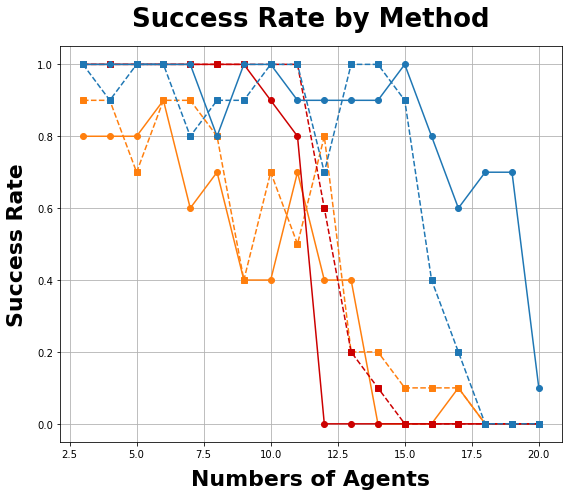

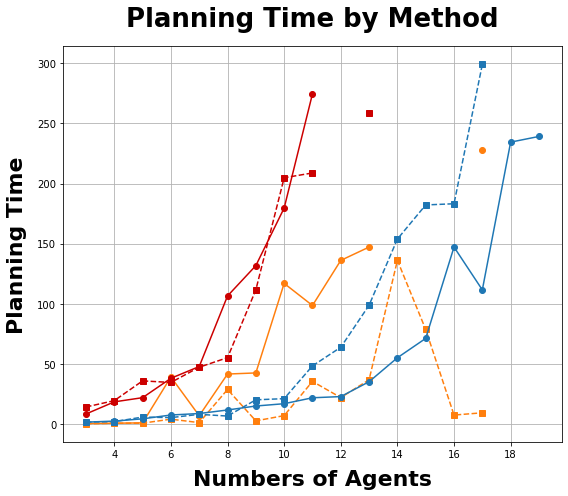

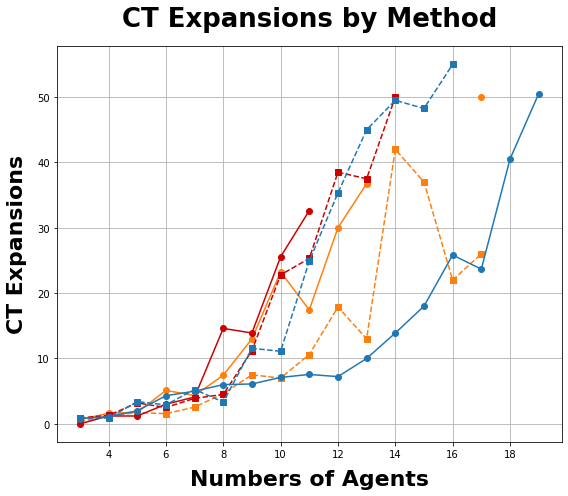

<<<<<<<ConveyorCircle>>>>>>
  planner_display path_length  mean_geo path_length_std mean_geo_std
0          A*-CBS        2.41  2.75e-03             nan          nan
1         A*-ECBS        2.42  2.57e-03             nan          nan
2            KCBS        2.70  2.07e-03            0.10     2.12e-04
3        MDOC-CBS        2.78  1.29e-03            0.04     1.40e-04
4       MDOC-ECBS        3.10  2.41e-03            0.11     5.78e-04
5         MMD-CBS        3.87  8.50e-03            0.11     5.45e-04

<<<<<<<ConveyorBoundary>>>>>>
  planner_display path_length  mean_geo path_length_std mean_geo_std
0          A*-CBS        2.33  3.00e-03             nan          nan
1         A*-ECBS        2.33  2.94e-03             nan          nan
2            KCBS        2.50  1.86e-03            0.13     2.67e-04
3        MDOC-CBS        2.72  1.38e-03            0.04     1.17e-04
4         MMD-CBS        4.27  9.14e-03            0.14     6.73e-04



In [17]:
params = [
#     {"env":["EmptyCircle"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_100_r", "methods":["A*-CBS", "A*-ECBS", "KCBS", "MMD-CBS", 'MDOC-CBS']},
#     {"env":["EmptyBoundary"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_100_r"},
#     {"env":["EmptyRandom"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_100_r"},
#     {"env":["ConveyorCircle"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_200_r"},
#     {"env":["ConveyorBoundary"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_200_r"},
#     {"env":["ConveyorRandom"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_200_r"},
    {"env":["EmptyCircle", "EmptyBoundary"], "ablation": False, "time_upper": 500, "mdoc_baseline":"single_100_r", "methods":["KCBS", "MMD-CBS", 'MDOC-CBS']},
    {"env":["ConveyorCircle", "ConveyorBoundary"], "ablation": False, "time_upper": 500, "mdoc_baseline":"single_200_r", "methods":["KCBS", "MMD-CBS", 'MDOC-CBS']}
]

for para in params:
    main(**para)

<<<<<<<EmptyRandom>>>>>>


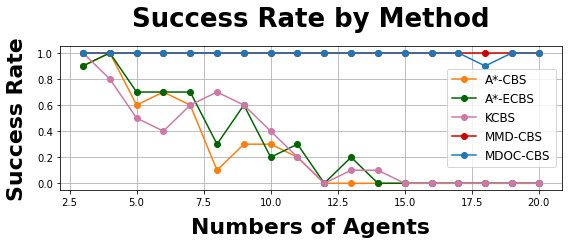

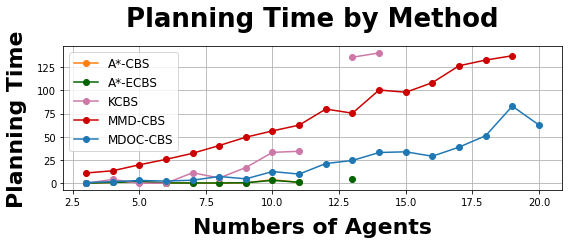

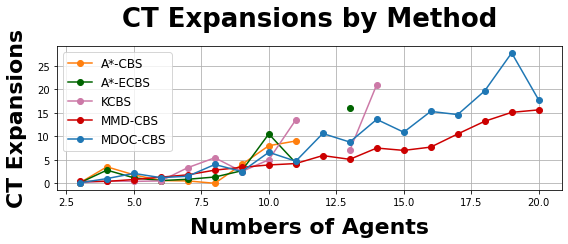

  planner_display path_length  mean_geo path_length_std mean_geo_std
0          A*-CBS        1.27  1.66e-03            0.23     4.22e-04
1         A*-ECBS        1.30  1.70e-03            0.21     4.95e-04
2            KCBS        1.23  1.55e-03            0.21     2.90e-04
3        MDOC-CBS        1.24  5.39e-05            0.15     6.52e-06
4         MMD-CBS        2.44  4.62e-03            0.09     4.21e-04



In [18]:
params = [
#     {"env":["EmptyCircle"], "ablation": True, "time_upper": 1000, "mdoc_baseline":"single_100_r", "methods":["A*-CBS", "A*-ECBS", "KCBS", "MMD-CBS", 'MDOC-CBS']},
#    {"env":["ConveyorCircle"], "ablation": False, "time_upper": 600, "mdoc_baseline":"single_200_r","methods":["A*-CBS", "A*-ECBS", "KCBS", "MMD-CBS", 'MDOC-CBS', 'MDOC-ECBS']},
#     {"env":["EmptyBoundary"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_100_r"},
     {"env":["EmptyRandom"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_100_r"},
#     {"env":["ConveyorCircle"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_200_r"},
#     {"env":["ConveyorBoundary"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_200_r"},
#     {"env":["ConveyorRandom"], "ablation": False, "time_upper": 1000, "mdoc_baseline":"single_200_r"},
#     {"env":["RandomBasic"], "ablation": False, "time_upper": 600, "mdoc_baseline":"single_100_r","methods":["A*-CBS", "A*-ECBS", "KCBS", "MMD-CBS"]},
#     {"env":["RandomDense"], "ablation": False, "time_upper": 600, "mdoc_baseline":"single_100_r","methods":["A*-CBS", "A*-ECBS", "KCBS", "MMD-CBS"]},
#     {"env":["RandomLarge"], "ablation": False, "time_upper": 600, "mdoc_baseline":"single_100_r","methods":["A*-CBS", "A*-ECBS", "KCBS"]},
]

for para in params:
    main(**para)